In [1]:
from sklearn.datasets import load_digits # The MNIST data set is in scikit learn data set
from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import accuracy_score # 
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier

import numpy as np
import numpy.random as r # We will randomly initialize our weights
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
df = pd.read_csv('csgo_round_snapshots.csv',header = 0)
df = df.dropna()


In [3]:
#Extract our weapons features
weapons_ct = df.loc[:, 'ct_weapon_ak47':'ct_weapon_tec9':2]
weapons_t = df.loc[:, 't_weapon_ak47':'t_weapon_tec9':2]


#Compile list of costs for each weapon
cost_list = np.array([2700,3300,4750,1400,500,400,2050,5000,1800,200,5200,2900,3100,1050,1300,1500,1500,1250,1700,1050,2350,600,1100,5000,3000,1700,1200,2000,700,500,200,300,200,500])
cost_list = np.transpose(cost_list)
#Calculate total weapon costs for T and CT
total_cost_ct = np.dot(weapons_ct,cost_list)
total_cost_t = np.dot(weapons_t,cost_list)


In [4]:
df_NW = df.drop(df.iloc[:, 16:84], axis = 1)
df_NW.insert(17,"Total Weapon Cost T", np.transpose(total_cost_t))
df_NW.insert(17,"Total Weapon Cost CT", np.transpose(total_cost_ct))

In [5]:
df_NW["round_winner"] = np.where(df_NW["round_winner"] ==  "CT", 1, df_NW["round_winner"])
df_NW["round_winner"] = np.where(df_NW["round_winner"] ==  "T",0, df_NW["round_winner"])
df_NW["bomb_planted"] = np.where(df_NW["bomb_planted"] ==  "True", 1, df_NW["bomb_planted"])
df_NW["bomb_planted"] = np.where(df_NW["bomb_planted"] ==  "False", 0, df_NW["bomb_planted"])

df_dust2 = df_NW.loc[df_NW["map"] == "de_dust2"]
df_inferno = df_NW.loc[df_NW["map"] == "de_inferno"]
df_nuke = df_NW.loc[df_NW["map"] == "de_nuke"]
df_mirage = df_NW.loc[df_NW["map"] == "de_mirage"]
df_overpass = df_NW.loc[df_NW["map"] == "de_overpass"]
df_vertigo = df_NW.loc[df_NW["map"] == "de_vertigo"]
df_train  = df_NW.loc[df_NW["map"] == "de_train"]
df_lst = [df_dust2,df_inferno,df_nuke,df_mirage,df_overpass,df_vertigo,df_train]

In [6]:
scaler = preprocessing.StandardScaler()


In [7]:
def run_nn(activ, regularization): 
    clf = MLPClassifier(hidden_layer_sizes=(7,7), activation=activation, solver = 'lbfgs',alpha = regularization,  
                        max_iter = 5000, random_state = 1)
    training_acc = []
    testing_acc = []
    for dataf in df_lst:
        print("Map:", dataf.iloc[0,dataf.columns.get_loc('map')])
    
    
        Y = np.array(dataf.loc[:, dataf.columns == 'round_winner'])
        df = dataf.drop(["map","round_winner"], axis = 1)
        Y=Y.astype(float)
        X_scale = scaler.fit_transform(df)
        X_scale=X_scale.astype(float)
        X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y,random_state = 1)
        
        Y_train = Y_train.reshape(Y_train.shape[0],)
        Y_test = Y_test.reshape(Y_test.shape[0],)

        clf.fit(X_train,Y_train)
        Yhat_train = clf.predict(X_train)
        Yhat_test = clf.predict(X_test)
        
        acc_train = accuracy_score(Y_train,Yhat_train)
        training_acc.append(acc_train)

        acc_test = accuracy_score(Y_test,Yhat_test)
        testing_acc.append(acc_test)
        
    data = [training_acc,testing_acc]

    training_acc_avg = np.mean(training_acc)
    testing_acc_avg = np.mean(testing_acc)

    training_acc_averages.append(training_acc_avg)
    testing_acc_averages.append(testing_acc_avg)

    map_names = ["Dust 2", "Inferno", "Nuke", "Mirage", "Overpass", "Vertigo", "Train"]
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    spacing = np.arange(len(map_names))

    ax.bar(spacing+0.2, data[0], color = 'b', width = 0.4)
    ax.bar(spacing-0.2, data[1], color = 'g', width = 0.4)

    ax.set_xticks(spacing)
    ax.set_xticklabels(map_names)

    ax.legend(labels=['Training Accuracy', 'Testing Accuracy'], loc = 'lower right')
    ax.text(7,0.5,'Average Training Accuracy: %f'% training_acc_avg, color = 'black',fontsize = 12)
    ax.text(7,0.4,'Average Testing Accuracy: %f' % testing_acc_avg,color = 'black',fontsize = 12)

    plt.xlabel("Map")
    plt.ylabel("Accuracy")
    plt.title("Neural Networks: {} Activation, alpha: {}".format(activ, regularization))
    plt.savefig("Neural Networks: {} Activation {}".format(activ, regularization), format = 'png')
    plt.show()

Map: de_dust2
Map: de_inferno
Map: de_nuke
Map: de_mirage
Map: de_overpass
Map: de_vertigo
Map: de_train


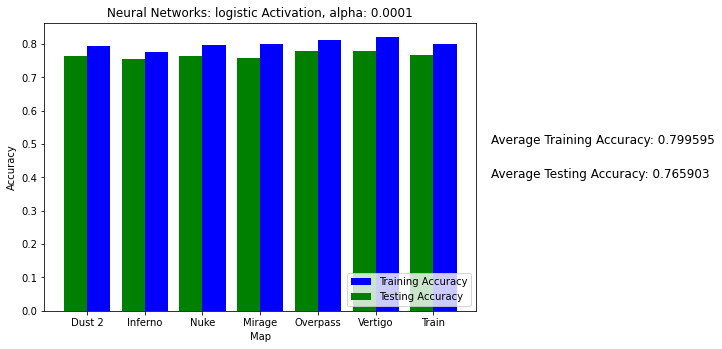

Map: de_dust2
Map: de_inferno
Map: de_nuke
Map: de_mirage
Map: de_overpass
Map: de_vertigo
Map: de_train


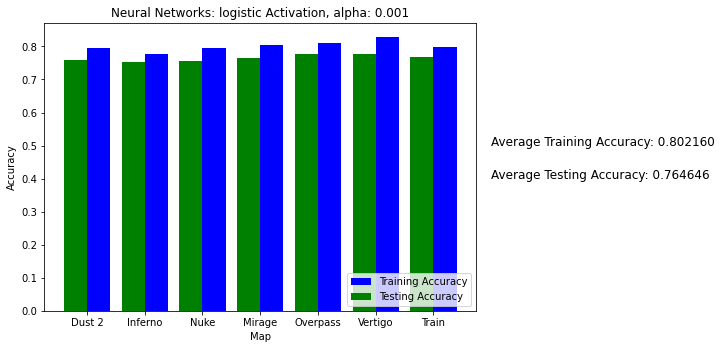

Map: de_dust2
Map: de_inferno
Map: de_nuke
Map: de_mirage
Map: de_overpass
Map: de_vertigo
Map: de_train


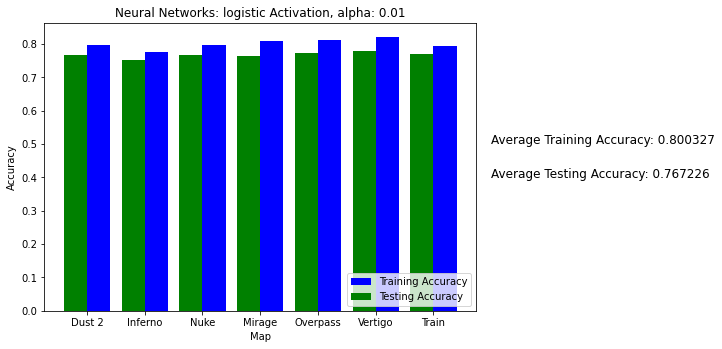

Map: de_dust2
Map: de_inferno
Map: de_nuke
Map: de_mirage
Map: de_overpass
Map: de_vertigo
Map: de_train


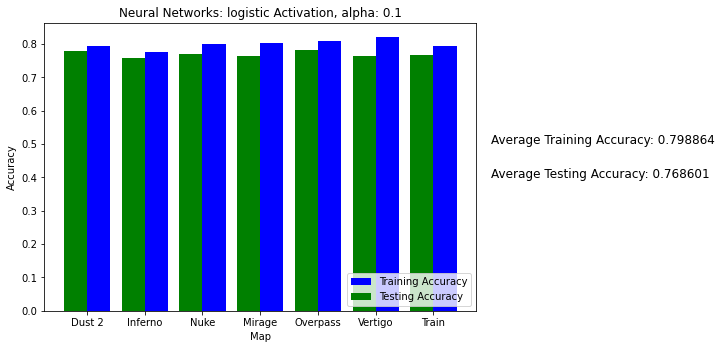

Map: de_dust2
Map: de_inferno
Map: de_nuke
Map: de_mirage
Map: de_overpass
Map: de_vertigo
Map: de_train


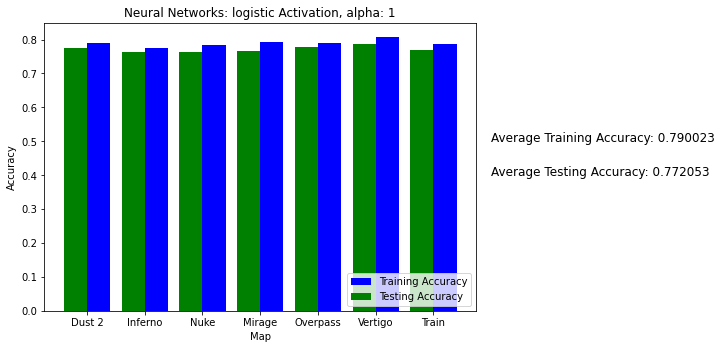

Map: de_dust2
Map: de_inferno
Map: de_nuke
Map: de_mirage
Map: de_overpass
Map: de_vertigo
Map: de_train


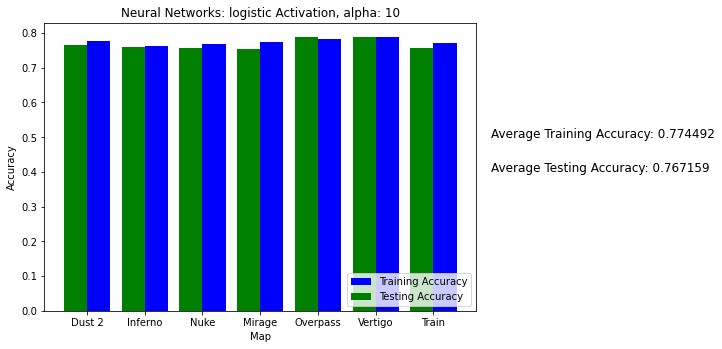

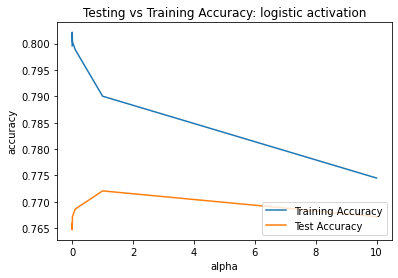

Map: de_dust2
Map: de_inferno
Map: de_nuke
Map: de_mirage
Map: de_overpass
Map: de_vertigo
Map: de_train


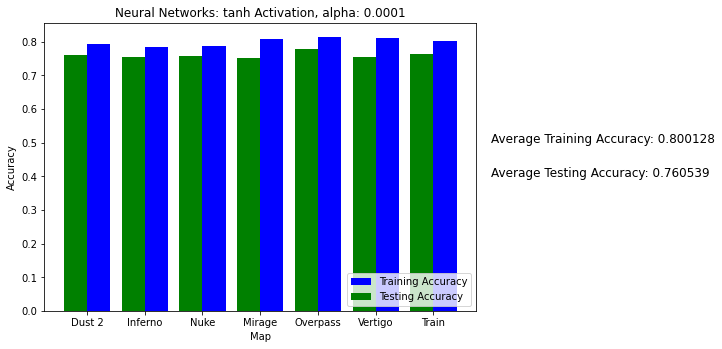

Map: de_dust2
Map: de_inferno
Map: de_nuke


C:\Users\kzhen\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Map: de_mirage


C:\Users\kzhen\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Map: de_overpass
Map: de_vertigo
Map: de_train


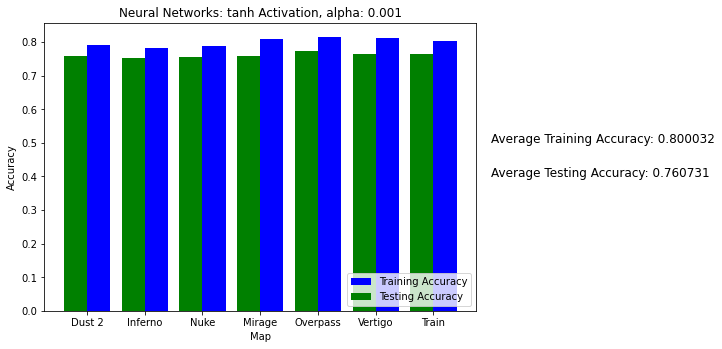

Map: de_dust2
Map: de_inferno
Map: de_nuke


C:\Users\kzhen\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Map: de_mirage
Map: de_overpass
Map: de_vertigo
Map: de_train


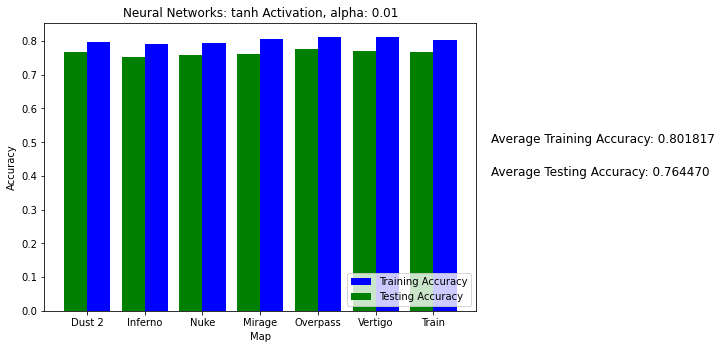

Map: de_dust2
Map: de_inferno
Map: de_nuke
Map: de_mirage
Map: de_overpass
Map: de_vertigo
Map: de_train


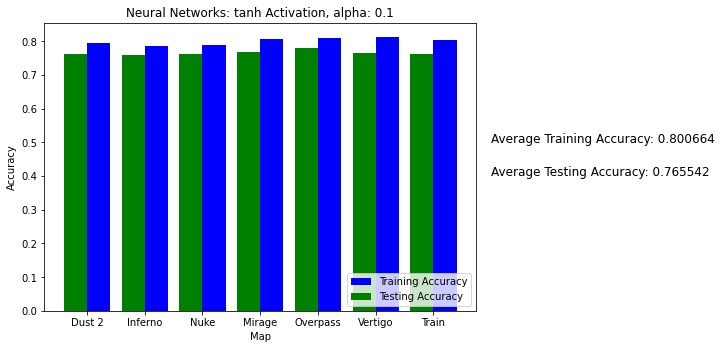

Map: de_dust2
Map: de_inferno
Map: de_nuke
Map: de_mirage
Map: de_overpass
Map: de_vertigo
Map: de_train


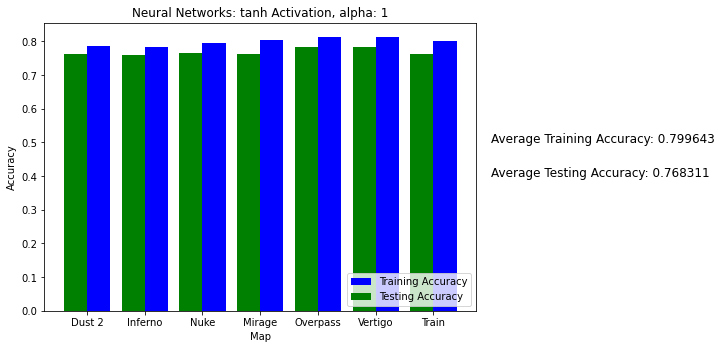

Map: de_dust2
Map: de_inferno
Map: de_nuke
Map: de_mirage
Map: de_overpass
Map: de_vertigo
Map: de_train


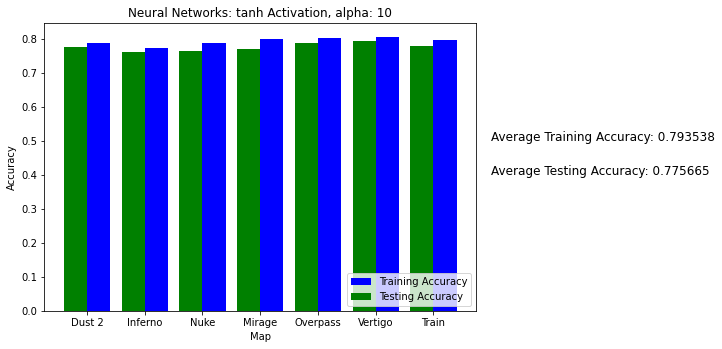

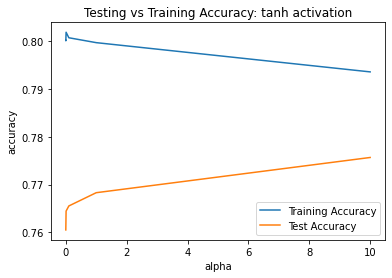

Map: de_dust2
Map: de_inferno
Map: de_nuke
Map: de_mirage
Map: de_overpass
Map: de_vertigo
Map: de_train


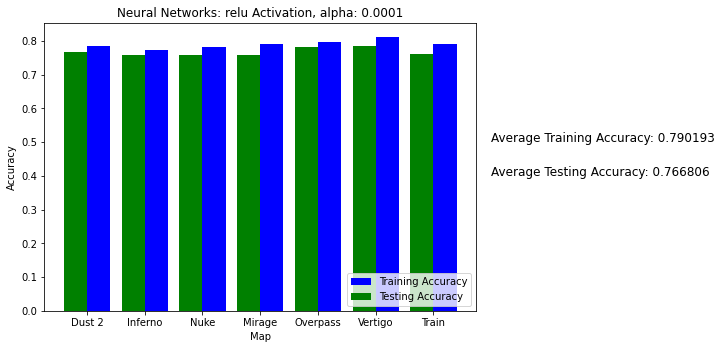

Map: de_dust2
Map: de_inferno
Map: de_nuke
Map: de_mirage
Map: de_overpass
Map: de_vertigo
Map: de_train


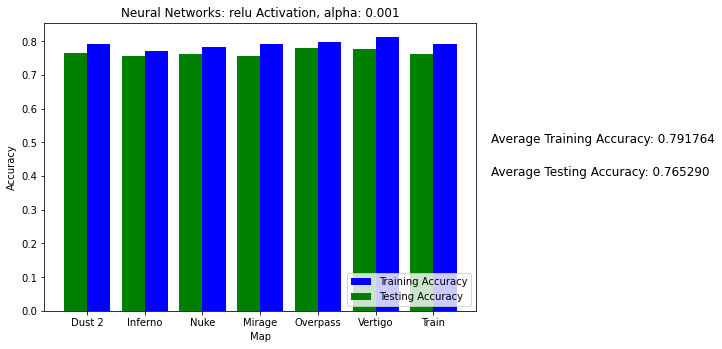

Map: de_dust2
Map: de_inferno
Map: de_nuke
Map: de_mirage
Map: de_overpass
Map: de_vertigo
Map: de_train


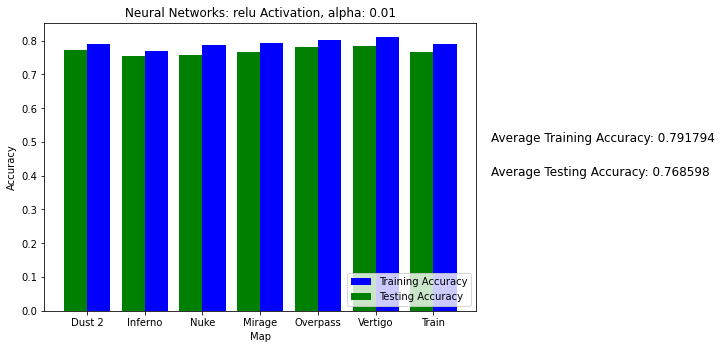

Map: de_dust2
Map: de_inferno
Map: de_nuke
Map: de_mirage
Map: de_overpass
Map: de_vertigo
Map: de_train


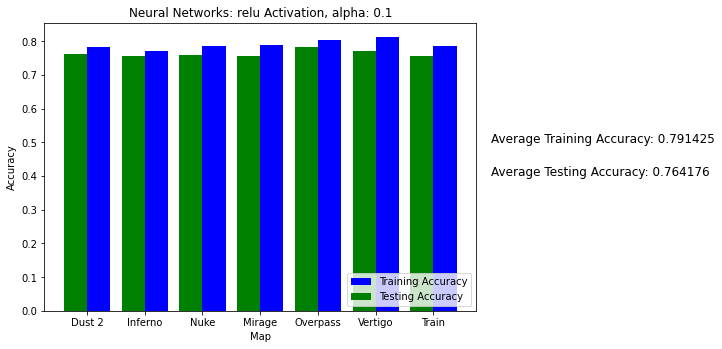

Map: de_dust2
Map: de_inferno
Map: de_nuke
Map: de_mirage
Map: de_overpass
Map: de_vertigo
Map: de_train


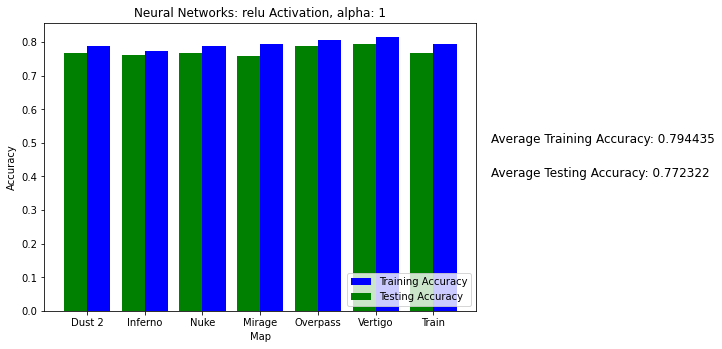

Map: de_dust2
Map: de_inferno
Map: de_nuke
Map: de_mirage
Map: de_overpass
Map: de_vertigo
Map: de_train


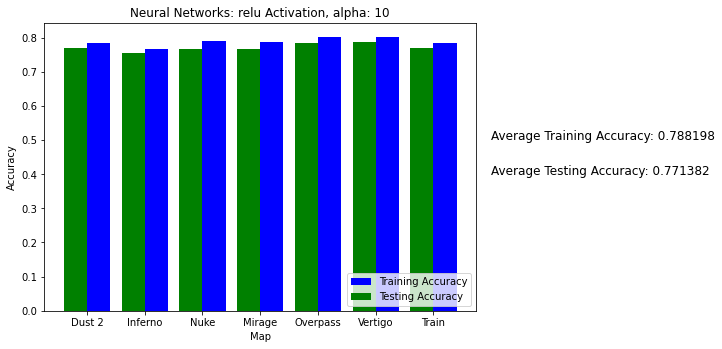

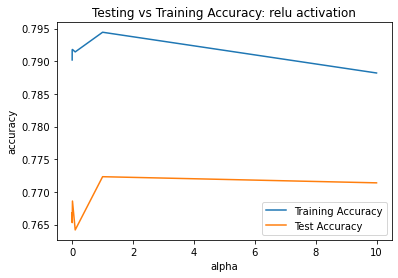

In [8]:
activations = ["logistic", "tanh", "relu"]
alpha = [0.0001,0.001,0.01,0.1,1,10]
for activation in activations:
    training_acc_averages = []
    testing_acc_averages = []
    for a in alpha:
        run_nn(activation, a)
    plt.plot(alpha, training_acc_averages)
    plt.plot(alpha, testing_acc_averages)

    plt.title("Testing vs Training Accuracy: %s activation" % activation)
    plt.xlabel("alpha")
    plt.ylabel("accuracy")

                # Use the following function to have a legend
    plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')
    plt.savefig("Testing vs Training Accuracy: %s activation" % activation,format = 'png')
    plt.show()

hi
